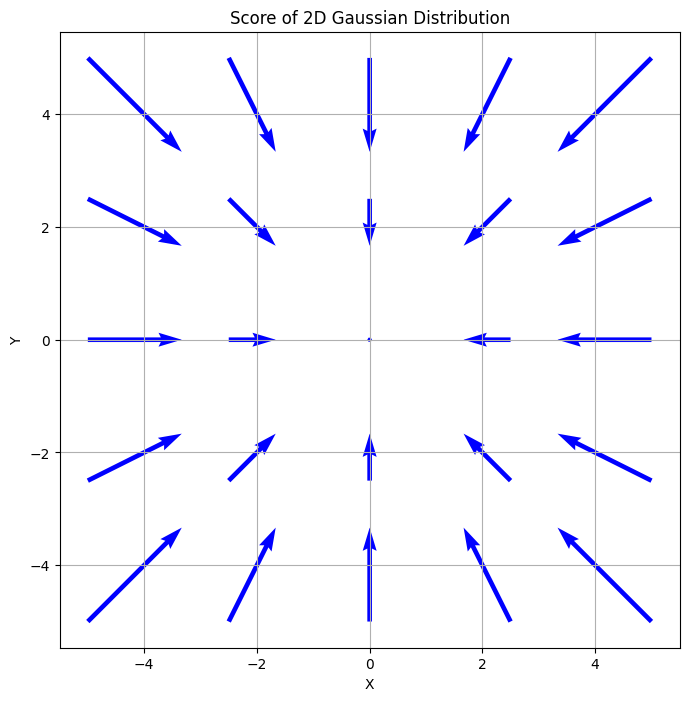

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean and covariance of the Gaussian distribution
mean = np.array([0.0, 0.0])
covariance = np.array([[1.0, 0.0], [0.0, 1.0]])

# Create a less dense grid of points
x, y = np.meshgrid(np.linspace(-5, 5, 5), np.linspace(-5, 5, 5))
pos = np.dstack((x, y))

# Calculate the multivariate normal distribution
rv = multivariate_normal(mean, covariance)

# Compute the score (gradient of the log-probability)
def score_function(mean, covariance, pos):
    inv_cov = np.linalg.inv(covariance)
    score = -np.dot(pos - mean, inv_cov)
    return score

# Get the score at each point
score = score_function(mean, covariance, pos)

# Extract components of the score
u = score[:, :, 0]
v = score[:, :, 1]

# Compute the magnitude of the score for scaling the arrow lengths
magnitude = np.sqrt(u**2 + v**2)

# Plot the score vectors
plt.figure(figsize=(8, 8))
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=3, color='blue')
plt.title('Score of 2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.axis('equal')
plt.show()

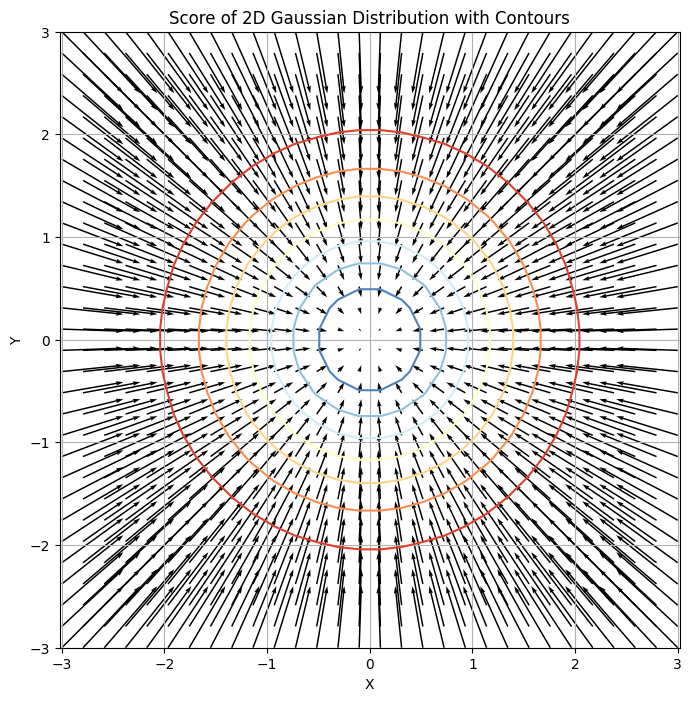

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean and covariance of the Gaussian distribution
mean = np.array([0.0, 0.0])
covariance = np.array([[1.0, 0.0], [0.0, 1.0]])

# Create a grid of points
x, y = np.meshgrid(np.linspace(-3, 3, 30), np.linspace(-3, 3, 30))
pos = np.dstack((x, y))

# Calculate the multivariate normal distribution
rv = multivariate_normal(mean, covariance)

# Compute the score (gradient of the log-probability)
def score_function(mean, covariance, pos):
    inv_cov = np.linalg.inv(covariance)
    score = -np.dot(pos - mean, inv_cov)
    return score

# Get the score at each point
score = score_function(mean, covariance, pos)

# Extract components of the score
u = score[:, :, 0]
v = score[:, :, 1]

# Compute the magnitude of the score for scaling the arrow lengths
magnitude = np.sqrt(u**2 + v**2)

# Plot the score vectors
plt.figure(figsize=(8, 8))

# Plot contours of the Gaussian distribution
z = rv.pdf(pos)
plt.contour(x, y, z, cmap='RdYlBu')

# Plot score vectors
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=5, color='black')
plt.title('Score of 2D Gaussian Distribution with Contours')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.axis('equal')
plt.show()

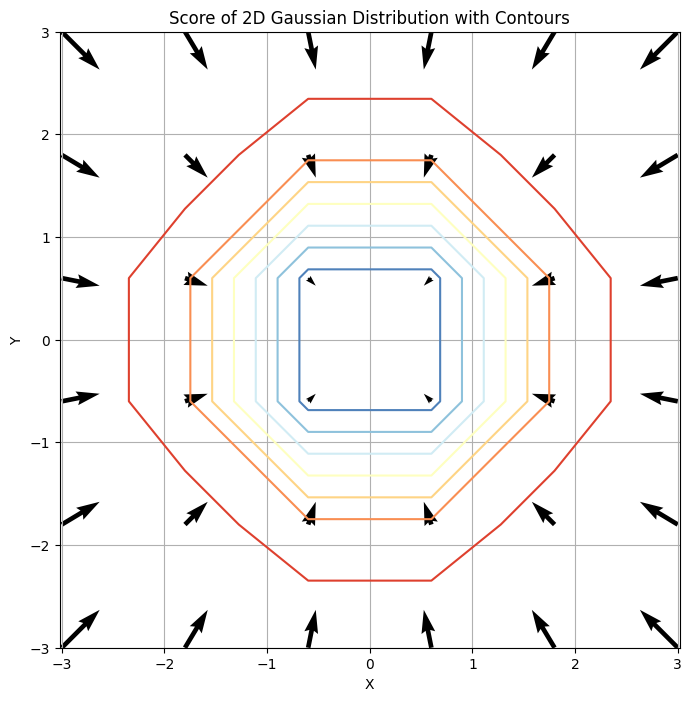

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean and covariance of the Gaussian distribution
mean = np.array([0.0, 0.0])
covariance = np.array([[1.0, 0.0], [0.0, 1.0]])

# Create a grid of points
x, y = np.meshgrid(np.linspace(-3, 3, 6), np.linspace(-3, 3, 6))
pos = np.dstack((x, y))

# Calculate the multivariate normal distribution
rv = multivariate_normal(mean, covariance)

# Compute the score (gradient of the log-probability)
def score_function(mean, covariance, pos):
    inv_cov = np.linalg.inv(covariance)
    score = -np.dot(pos - mean, inv_cov)
    return score

# Get the score at each point
score = score_function(mean, covariance, pos)

# Extract components of the score
u = score[:, :, 0]
v = score[:, :, 1]

# Compute the magnitude of the score for scaling the arrow lengths
magnitude = np.sqrt(u**2 + v**2)

# Plot the score vectors
plt.figure(figsize=(8, 8))

# Plot contours of the Gaussian distribution
z = rv.pdf(pos)
plt.contour(x, y, z, cmap='RdYlBu')

# Plot score vectors without scaling the arrow lengths
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', color='black')
plt.title('Score of 2D Gaussian Distribution with Contours')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.axis('equal')
plt.show()

In [14]:
!pip install scikit-learn

   ---------------------------------------- 0.0/9.3 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.3 MB 5.2 MB/s eta 0:00:02
   ---- ----------------------------------- 1.2/9.3 MB 12.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.3 MB 20.9 MB/s eta 0:00:01
   ------------------- -------------------- 4.5/9.3 MB 23.7 MB/s eta 0:00:01
   ---------------------- ----------------- 5.1/9.3 MB 21.7 MB/s eta 0:00:01
   ------------------------------- -------- 7.4/9.3 MB 26.2 MB/s eta 0:00:01
   ---------------------------------------  9.2/9.3 MB 28.1 MB/s eta 0:00:01
   ---------------------------------------- 9.3/9.3 MB 26.9 MB/s eta 0:00:00


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Define the parameters of the Gaussian mixture model
n_components = 3
means = np.array([[0.0, 0.0], [2.0, 2.0], [-2.0, -2.0]])
covariances = np.array([[[1.0, 0.5], [0.5, 1.0]],
                        [[1.0, -0.3], [-0.3, 1.0]],
                        [[1.0, 0.3], [0.3, 1.0]]])

# Create a Gaussian mixture model with predefined parameters
gmm = GaussianMixture(n_components=n_components, covariance_type='full')
gmm.means_ = means
gmm.covariances_ = covariances
gmm.precisions_cholesky_ = np.linalg.cholesky(np.linalg.inv(covariances))

# Create a grid of points
x, y = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
pos = np.dstack((x, y))

# Compute the score (gradient of the log-probability) for the GMM
def gmm_score_function(gmm, pos):
    n_samples = pos.shape[0] * pos.shape[1]
    samples = pos.reshape(-1, 2)
    scores = gmm.score_samples(samples).reshape(pos.shape[:2])
    
    # Compute the gradient of the log-probability
    grad_x, grad_y = np.gradient(scores)
    return -grad_x, -grad_y

# Get the score at each point
u, v = gmm_score_function(gmm, pos)

# Plot the score vectors
plt.figure(figsize=(8, 8))

# Plot contours of the GMM
z = np.exp(gmm.score_samples(pos.reshape(-1, 2)).reshape(pos.shape[:2]))
plt.contour(x, y, z, cmap='RdYlBu')

# Plot score vectors without scaling the arrow lengths
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', color='black')
plt.title('Score of Gaussian Mixture Model with Contours')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.axis('equal')
plt.show()

AttributeError: 'GaussianMixture' object has no attribute 'weights_'

c:\Users\zhaoh\anaconda3\envs\diffusion_sde\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


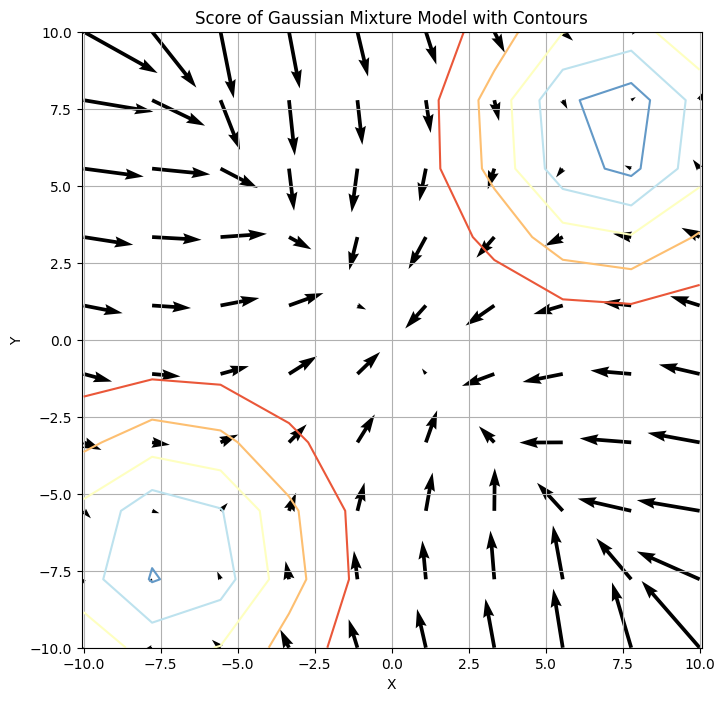

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Define the parameters for generating sample data
np.random.seed(0)
n_samples = 300
means = np.array([[-7.0, -7.0], [7.0, 7.0]])
covariances = np.array([[[10.0, 0.0], [0.0, 10.0]],
                        [[10.0, 0.0], [0.0, 10.0]]])

# Generate sample data
X = np.vstack([np.random.multivariate_normal(means[i], covariances[i], n_samples)
               for i in range(len(means))])

# Fit the Gaussian mixture model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X)

# Create a grid of points
x, y = np.meshgrid(np.linspace(-10, 10, 10), np.linspace(-10, 10, 10))
pos = np.dstack((x, y))

# Compute the score (gradient of the log-probability) for the GMM
def gmm_score_function(gmm, pos):
    n_samples = pos.shape[0] * pos.shape[1]
    samples = pos.reshape(-1, 2)
    
    # Calculate the log-probability of the samples
    log_prob = gmm.score_samples(samples).reshape(pos.shape[:2])
    
    # Compute the gradient of the log-probability
    grad_x, grad_y = np.gradient(log_prob)
    return -grad_x, -grad_y

# Get the score at each point
u, v = gmm_score_function(gmm, pos)

# Plot the score vectors
plt.figure(figsize=(8, 8))

# Plot contours of the GMM
z = np.exp(gmm.score_samples(pos.reshape(-1, 2)).reshape(pos.shape[:2]))
plt.contour(x, y, z, cmap='RdYlBu')

# Plot score vectors without scaling the arrow lengths
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', color='black')
plt.title('Score of Gaussian Mixture Model with Contours')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.axis('equal')
plt.show()

c:\Users\zhaoh\anaconda3\envs\diffusion_sde\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


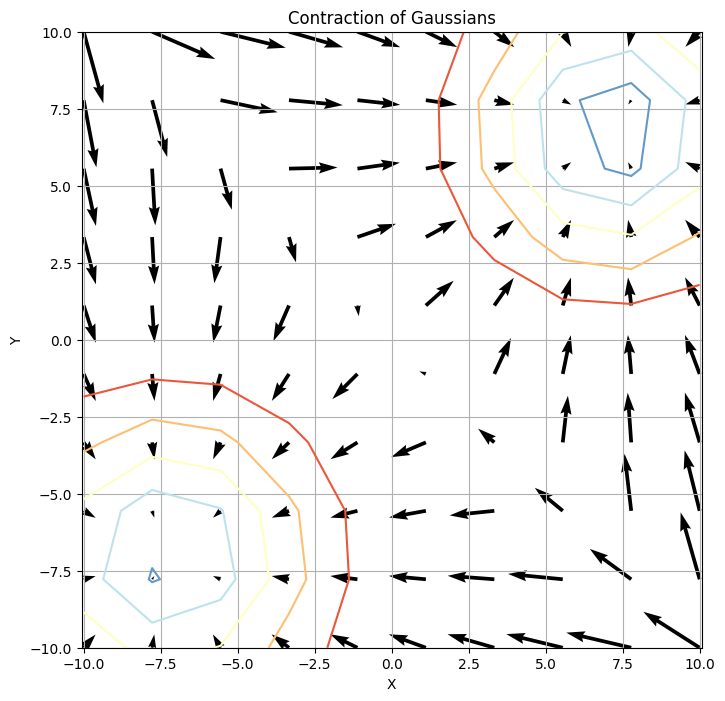

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Define the parameters for generating sample data
np.random.seed(0)
n_samples = 300
means = np.array([[-7.0, -7.0], [7.0, 7.0]])
covariances = np.array([[[10.0, 0.0], [0.0, 10.0]],
                        [[10.0, 0.0], [0.0, 10.0]]])

# Generate sample data
X = np.vstack([np.random.multivariate_normal(means[i], covariances[i], n_samples)
               for i in range(len(means))])

# Fit the Gaussian mixture model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
gmm.fit(X)

# Create a grid of points
x, y = np.meshgrid(np.linspace(-10, 10, 10), np.linspace(-10, 10, 10))
pos = np.dstack((x, y))

# Compute the score (gradient of the log-probability) for the GMM
def gmm_score_function(gmm, pos):
    samples = pos.reshape(-1, 2)
    log_prob = gmm.score_samples(samples)
    
    # Compute the gradients numerically
    epsilon = 1e-6
    grad_x = (gmm.score_samples(samples + [epsilon, 0]) - log_prob) / epsilon
    grad_y = (gmm.score_samples(samples + [0, epsilon]) - log_prob) / epsilon
    
    grad_x = grad_x.reshape(pos.shape[:2])
    grad_y = grad_y.reshape(pos.shape[:2])
    
    return grad_x, grad_y

# Get the score at each point
u, v = gmm_score_function(gmm, pos)

# Plot the score vectors
plt.figure(figsize=(8, 8))

# Plot contours of the GMM
z = np.exp(gmm.score_samples(pos.reshape(-1, 2)).reshape(pos.shape[:2]))
plt.contour(x, y, z, cmap='RdYlBu')

# Plot score vectors without scaling the arrow lengths
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', color='black')
plt.title('Contraction of Gaussians')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.axis('equal')
plt.show()

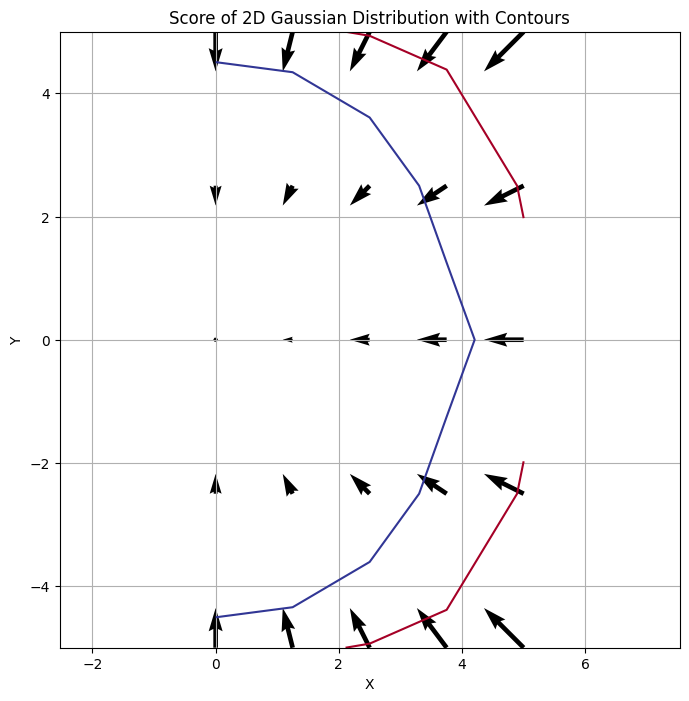

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean and covariance of the Gaussian distribution
mean = np.array([0.0, 0.0])
covariance = np.array([[4.0, 0.0], [0.0, 4.0]])

# Create a less dense grid of points
x, y = np.meshgrid(np.linspace(0, 5, 5), np.linspace(-5, 5, 5))
pos = np.dstack((x, y))

# Calculate the multivariate normal distribution
rv = multivariate_normal(mean, covariance)

# Compute the score (gradient of the log-probability)
def score_function(mean, covariance, pos):
    inv_cov = np.linalg.inv(covariance)
    score = -np.dot(pos - mean, inv_cov)
    return score

score = score_function(mean, covariance, pos)

# Extract components of the score
u = score[:, :, 0]
v = score[:, :, 1]

# Compute the magnitude of the score for scaling the arrow lengths
magnitude = np.sqrt(u**2 + v**2)

# Plot the score vectors and contours
plt.figure(figsize=(8, 8))

# Plot contours of the Gaussian distribution with just two levels
z = rv.pdf(pos)
contour_levels = [0.001, 0.005]  # specify two contour levels
plt.contour(x, y, z, levels=contour_levels, cmap='RdYlBu')

# Plot score vectors without scaling the arrow lengths
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', color='black')
plt.title('Score of 2D Gaussian Distribution with Contours')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()
plt.axis('equal')
plt.show() 

C:\Users\zhaoh\AppData\Local\Temp\ipykernel_64940\118274104.py:34: RuntimeWarning: invalid value encountered in divide
  u_normalized = u / magnitude
C:\Users\zhaoh\AppData\Local\Temp\ipykernel_64940\118274104.py:35: RuntimeWarning: invalid value encountered in divide
  v_normalized = v / magnitude


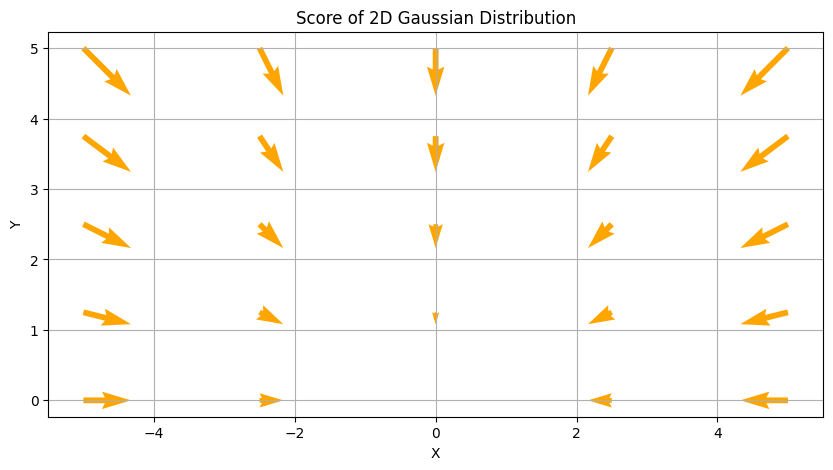

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the mean and covariance of the Gaussian distribution
mean = np.array([0.0, 0.0])
covariance = np.array([[0.1, 0.0], [0.0, 0.1]])

# Create a less dense grid of points
x, y = np.meshgrid(np.linspace(-5, 5, 5), np.linspace(0, 5, 5))
pos = np.dstack((x, y))


# Calculate the multivariate normal distribution
rv = multivariate_normal(mean, covariance)

# Compute the score (gradient of the log-probability)
def score_function(mean, covariance, pos):
    inv_cov = np.linalg.inv(covariance)
    score = -np.dot(pos - mean, inv_cov)
    return score

# Get the score at each point
score = score_function(mean, covariance, pos)

# Extract components of the score
u = score[:, :, 0]
v = score[:, :, 1]

# Compute the magnitude of the score
magnitude = np.sqrt(u**2 + v**2)

# Normalize the vectors to make the length proportional to the score value
u_normalized = u / magnitude
v_normalized = v / magnitude

# Scale the arrows by the magnitude of the score
u_scaled = u_normalized * magnitude
v_scaled = v_normalized * magnitude

# Plot the score vectors and contours
plt.figure(figsize=(10, 5))

# Plot score vectors, with lengths proportional to the magnitude of the score
plt.quiver(x, y, u_scaled, v_scaled, angles='xy', scale_units='xy', color='orange')
plt.title('Score of 2D Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-5, 5)
plt.ylim(-1, 5)
plt.grid()
plt.axis('equal')
plt.show()